# Dijkstra


In [1]:
from hoteling.graph_generators import generate_grid_graph

g = generate_grid_graph(3, 4)

In [3]:
from hoteling.branch_bound import BBTree, BaseRevenueFunction, Node


base_cost = 3
revenue_function = BaseRevenueFunction(base_cost)

M = 8 
bb_tree = BBTree(g, M, revenue_function)
bb_tree.run(max_iterations=400)
bb_tree.run_stat

runStatistics(open_nodes=49, reused_nodes=2258, rejected_nodes=54)

In [4]:
positions = Node.get_positions(
    g,
    bb_tree.occupation,
    M,
    "weight",
    revenue_function,extended_return=True)
positions

{'num_sellers': {0: 1, 5: 1, 3: 1, 6: 1, 4: 1, 7: 1, 9: 1, 10: 1},
 'lambd': np.float64(4.0000000001),
 'nearest_set': <VertexPropertyMap object with value type 'python::object', for Graph 0x116d39e80, at 0x120262f90>,
 'distances': <VertexPropertyMap object with value type 'double', for Graph 0x116d39e80, at 0x120262f20>,
 'revenues': defaultdict(float,
             {0: 4.0,
              5: 4.0,
              3: 4.0,
              6: 4.0,
              4: 4.0,
              7: 4.0,
              9: 4.0,
              10: 4.0})}

In [5]:
from graph_tool.draw import graph_draw, sfdp_layout

def plot_sellers(positions: dict):

    nearest_set = positions["nearest_set"]
    num_sellers = positions["num_sellers"]   # dict: Vertex -> int/float
    revenues    = positions["revenues"]      # dict: Vertex -> float

    # Подписи
    v_label = g.new_vertex_property("string")
    for v in g.vertices():
        if int(v) in num_sellers:
            print(v)
            k = int(num_sellers[v])
            rev = float(revenues[v])
            rps = rev / max(k, 1)
            v_label[v] = f"{int(v)}:\n#: {k}\n$: {rps:.2f}"
        else:
            nb = [int(u) for u in nearest_set[v]]
            v_label[v] = f"{int(v)}:\n{nb}"

    # Цвета
    is_seller = g.new_vertex_property("bool")
    v_color   = g.new_vertex_property("string")
    for v in g.vertices():
        flag = bool(int(v) in num_sellers)
        is_seller[v] = flag
        v_color[v]   = "#e67e22" if flag else "#546e7a"   # оранжевый / стальной

    # Размеры под текст
    v_size = g.new_vertex_property("double")
    for v in g.vertices():
        lines = v_label[v].split("\n")
        v_size[v] = 6 + 2.0 * max(len(t) for t in lines) + 5.0 * (len(lines) - 1)

    # Позиции
    pos = positions.get("pos")
    if pos is None:
        pos = sfdp_layout(g)

    # Рисуем
    graph_draw(
        g,
        pos=pos,
        vertex_text=v_label,
        vertex_fill_color=v_color,
        # vertex_text_position=-1,
        vertex_size=v_size,
        vertex_font_size=12,
        text_wrap=True,         # важный параметр для переноса
        text_wrap_width=18,     # подберите под ваш шрифт/масштаб
        output_size=(1000, 800),
        output="graph_with_ids.png",
    )


KeyboardInterrupt: 

4
5
6
7


/Users/ilgam/miniconda3/envs/ml/lib/python3.12/site-packages/graph_tool/draw/cairo_draw.py:677: UserWarning: Unknown parameter: text_wrap
  warnings.warn("Unknown parameter: " + k, UserWarning)
/Users/ilgam/miniconda3/envs/ml/lib/python3.12/site-packages/graph_tool/draw/cairo_draw.py:677: UserWarning: Unknown parameter: text_wrap_width
  warnings.warn("Unknown parameter: " + k, UserWarning)


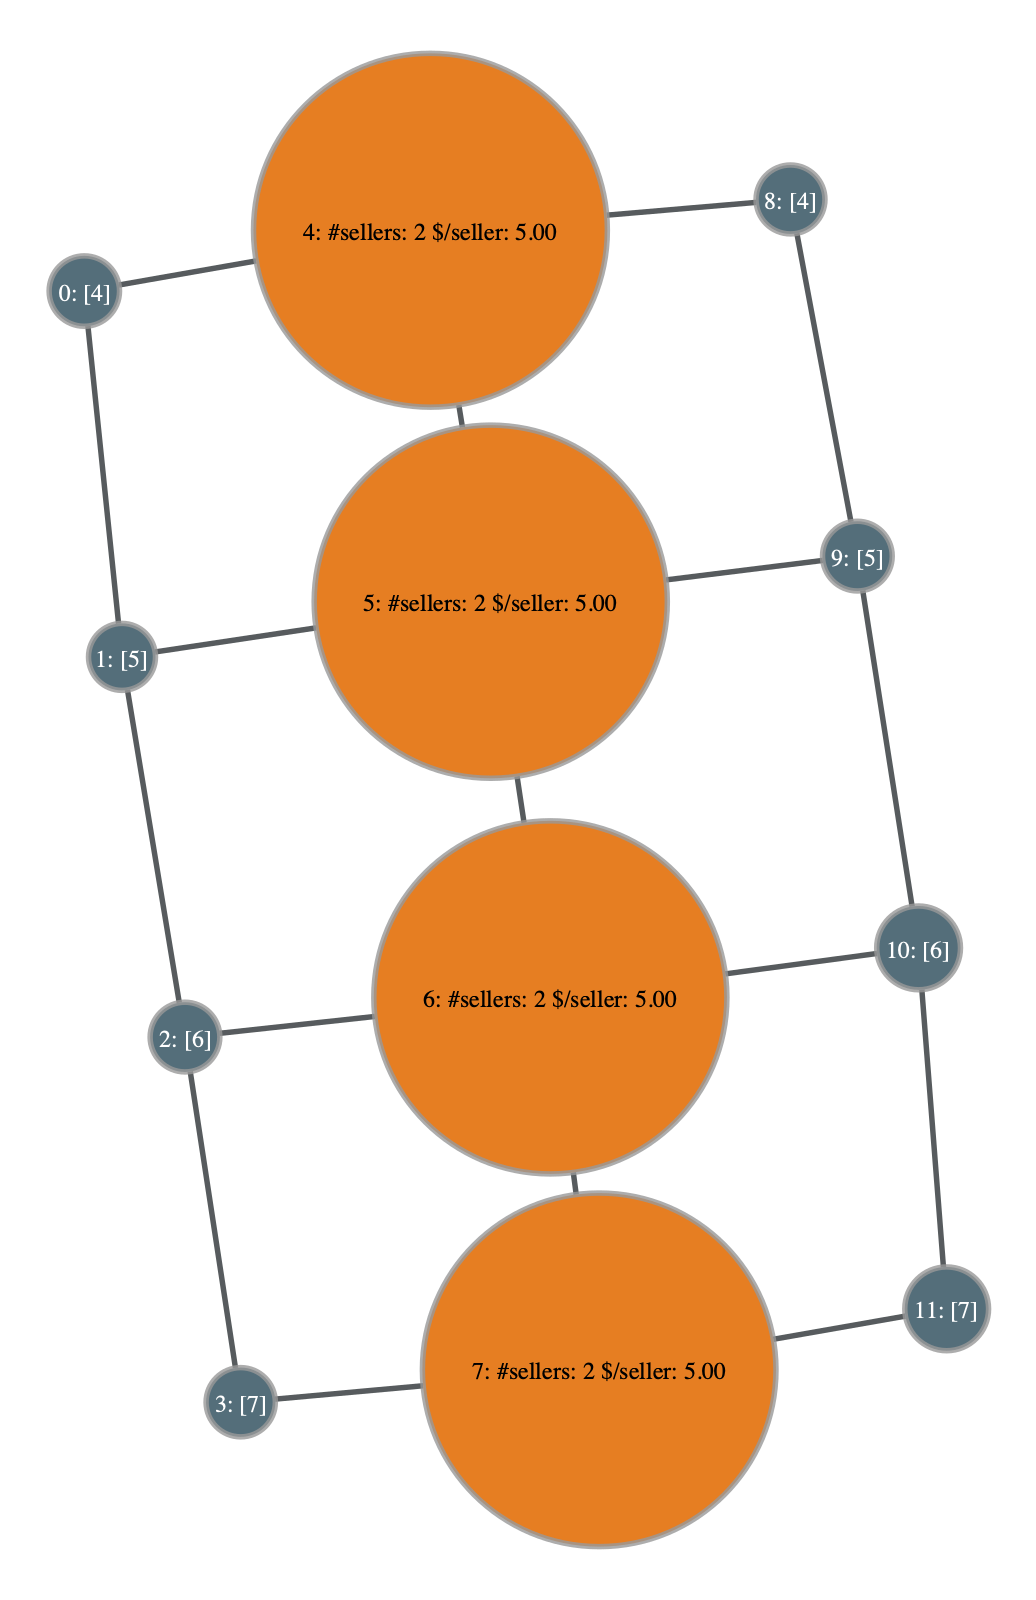

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x11992c9e0, at 0x119a597c0>

In [5]:
from graph_tool.draw import graph_draw, sfdp_layout


positions = Node.get_positions(
    g,
    bb_tree.occupation,
    M,
    "weight",
    revenue_function,extended_return=True)


nearest_set = positions["nearest_set"]
num_sellers = positions["num_sellers"]   # dict: Vertex -> int/float
revenues    = positions["revenues"]      # dict: Vertex -> float

# Подписи
v_label = g.new_vertex_property("string")
for v in g.vertices():
    if int(v) in num_sellers:
        print(v)
        k = int(num_sellers[v])
        rev = float(revenues[v])
        rps = rev / max(k, 1)
        v_label[v] = f"{int(v)}:\n#sellers: {k}\n$/seller: {rps:.2f}"
    else:
        nb = [int(u) for u in nearest_set[v]]
        v_label[v] = f"{int(v)}:\n{nb}"

# Цвета
is_seller = g.new_vertex_property("bool")
v_color   = g.new_vertex_property("string")
for v in g.vertices():
    flag = bool(int(v) in num_sellers)
    is_seller[v] = flag
    v_color[v]   = "#e67e22" if flag else "#546e7a"   # оранжевый / стальной

# Размеры под текст
v_size = g.new_vertex_property("double")
for v in g.vertices():
    lines = v_label[v].split("\n")
    v_size[v] = 6 + 2.0 * max(len(t) for t in lines) + 6.0 * (len(lines) - 1)

# Позиции
pos = positions.get("pos")
if pos is None:
    pos = sfdp_layout(g)

# Рисуем
graph_draw(
    g,
    pos=pos,
    vertex_text=v_label,
    vertex_fill_color=v_color,
    # vertex_text_position=-1,
    vertex_size=v_size,
    vertex_font_size=12,
    text_wrap=True,         # важный параметр для переноса
    text_wrap_width=18,     # подберите под ваш шрифт/масштаб
    output_size=(1000, 800),
    # output="graph_with_ids.png",
)


In [ ]:
from htglib import HotellingGame
from branch_bound import BBTree, BaseRevenueFunction, Node, bin_search

from htglib.graph_generators import (
    generate_line_graph, generate_star_graph, generate_random_tree, generate_grid_graph,
    place_sellers_randomly, place_sellers_spaced,
    
    create_line_game, create_star_game, create_grid_game
)

grid_graph = generate_grid_graph(3, 4)       # Только граф
g = grid_graph.graph

In [10]:
from hoteling.widget import panel_gt_interactive
panel_gt_interactive(g, revenue_function)